# Import Dataset & libraries

In [1]:
#import kaggle

In [2]:
#!kaggle competitions download -c house-prices-advanced-regression-techniques

In [3]:
#from zipfile import ZipFile
#
#file_name = 'house-prices-advanced-regression-techniques.zip'
#z = ZipFile(file_name)
#print(z.namelist())

In [4]:
# !unzip house-prices-advanced-regression-techniques.zip

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib
import warnings
warnings.filterwarnings('ignore')

pd.options.display.max_columns=200
pd.options.display.max_rows=200
plt.style.use('seaborn-whitegrid')

In [6]:
prices = pd.read_csv('train.csv')
prices.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [7]:
#prices.info()

# prepare the dataset for training

In [8]:
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.impute import SimpleImputer

# Identify input and target columns :
input_cols, target_col = prices.columns[1:-1], prices.columns[-1]
inputs_df, targets = prices[input_cols].copy(), prices[target_col].copy()

# Identifying numeric & categorical columns :
numeric_cols = inputs_df.select_dtypes(include = np.number).columns.tolist()
categorical_cols = inputs_df.select_dtypes(include = 'object').columns.tolist()

# Impute missing values and scale numeric columns :
imputer = SimpleImputer().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = imputer.transform(inputs_df[numeric_cols])

scaler = MinMaxScaler().fit(inputs_df[numeric_cols])
inputs_df[numeric_cols] = scaler.transform(inputs_df[numeric_cols])

# One-hot encode categorical columns :
encoder = OneHotEncoder(sparse=False, handle_unknown='ignore').fit(inputs_df[categorical_cols])
encoded_cols = list(encoder.get_feature_names(categorical_cols))
inputs_df[encoded_cols] = encoder.transform(inputs_df[categorical_cols])

# Create training and validation sets :
train_inputs, val_inputs, train_targets, val_targets = tts(
    inputs_df[numeric_cols + encoded_cols], targets, test_size=0.25, random_state=42)

## Decision Tree
> **QUESTION 1**: Train a decision tree regressor using the training set.

In [9]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state=42)

tree.fit(train_inputs, train_targets)

DecisionTreeRegressor(random_state=42)

> **QUESTION 2**: Generate predictions on the training and validation sets using the trained decision tree, and compute the RMSE loss.

In [10]:
from sklearn.metrics import mean_squared_error
tree_train_preds = tree.predict(train_inputs)
tree_train_rmse = mean_squared_error(train_targets, tree_train_preds, squared=False)
print('RMSE:',tree_train_rmse)
print('-'*50)
print('Accuracy :',tree.score(train_inputs, tree_train_preds))

RMSE: 0.0
--------------------------------------------------
Accuracy : 1.0


In [11]:
tree_val_preds = tree.predict(val_inputs)
tree_val_rmse = mean_squared_error(val_targets, tree_val_preds, squared=False)
print('RMSE :', tree_val_rmse)
print('-'*50)
print('Accuracy :',tree.score(val_inputs, val_targets))

RMSE : 37802.872039112044
--------------------------------------------------
Accuracy : 0.7960036989476907


In [12]:
print('Train RMSE: {}, Validation RMSE: {}'.format(tree_train_rmse, tree_val_rmse))

Train RMSE: 0.0, Validation RMSE: 37802.872039112044


> **QUESTION 3**: Visualize the decision tree (graphically and textually) and display feature importances as a graph. Limit the maximum depth of graphical visualization to 3 levels.

# Visualization 📚

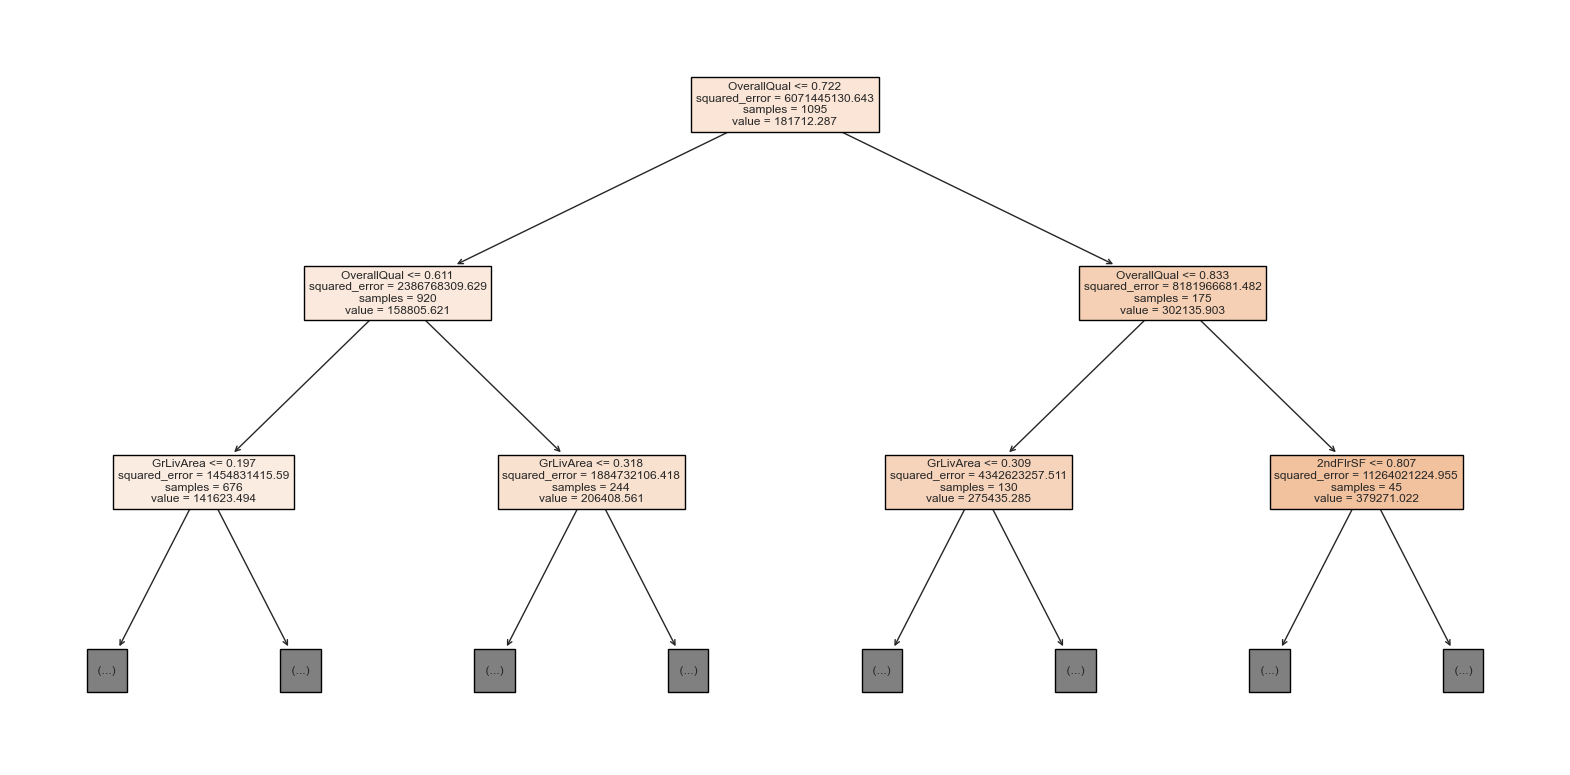

In [13]:
from sklearn.tree import plot_tree, export_text
plt.figure(figsize=(20,10), dpi = 100)
plot_tree(tree, feature_names= train_inputs.columns, max_depth = 2, filled = True);

In [14]:
tree.tree_.max_depth

20

We can also display the tree as text, which can be easier to follow for deeper trees.

In [15]:
tree_text = export_text(tree, max_depth=10, feature_names = list(train_inputs.columns))
print(tree_text[:2000])

|--- OverallQual <= 0.72
|   |--- OverallQual <= 0.61
|   |   |--- GrLivArea <= 0.20
|   |   |   |--- TotalBsmtSF <= 0.16
|   |   |   |   |--- OverallQual <= 0.39
|   |   |   |   |   |--- GarageCond_TA <= 0.50
|   |   |   |   |   |   |--- LotArea <= 0.04
|   |   |   |   |   |   |   |--- CentralAir_Y <= 0.50
|   |   |   |   |   |   |   |   |--- YearBuilt <= 0.54
|   |   |   |   |   |   |   |   |   |--- SaleCondition_Abnorml <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- Neighborhood_BrkSide <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 3
|   |   |   |   |   |   |   |   |   |   |--- Neighborhood_BrkSide >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- value: [39300.00]
|   |   |   |   |   |   |   |   |   |--- SaleCondition_Abnorml >  0.50
|   |   |   |   |   |   |   |   |   |   |--- 2ndFlrSF <= 0.09
|   |   |   |   |   |   |   |   |   |   |   |--- value: [34900.00]
|   |   |   |   |   |   |   |   |   |   |--- 2ndFlrSF >  0.09
|   |   |  

In [16]:
tree_importances = tree.feature_importances_
print(tree_importances)

[5.24715887e-04 2.27834604e-02 7.35354083e-03 6.32536953e-01
 4.79463510e-03 5.50191212e-03 3.54847829e-03 1.30041213e-03
 2.50802650e-02 1.91834499e-04 1.65506178e-03 2.85039383e-02
 2.67298588e-02 3.18959587e-02 0.00000000e+00 1.04333551e-01
 2.12598512e-04 7.12595424e-06 7.97204380e-07 5.01587709e-05
 4.34223986e-03 0.00000000e+00 1.47122326e-03 1.05104318e-04
 8.08475709e-03 4.67107296e-03 1.09161494e-02 4.20724050e-03
 7.99507755e-03 1.02023515e-05 2.31407875e-05 2.99639210e-03
 0.00000000e+00 2.43673791e-07 8.45351967e-03 6.78752528e-04
 0.00000000e+00 0.00000000e+00 1.82755344e-07 1.53063309e-06
 5.73689248e-05 1.08299463e-05 0.00000000e+00 6.26733003e-07
 1.22920287e-04 4.34401179e-06 2.66148472e-04 4.23044777e-06
 0.00000000e+00 4.45708823e-05 4.20285403e-05 5.64059703e-06
 0.00000000e+00 1.22423067e-04 0.00000000e+00 0.00000000e+00
 1.17349487e-06 7.52079603e-10 2.83810040e-04 0.00000000e+00
 1.10395332e-04 1.17512438e-05 8.73772852e-05 0.00000000e+00
 0.00000000e+00 0.000000

### Create table of features and its importance.

In [17]:
# Let's turn this into a dataframe and visualize the most important features.
tree_importance_df = pd.DataFrame({'feature': train_inputs.columns,
                                  'importance':tree_importances}).sort_values('importance',ascending = False)
tree_importance_df

,feature,importance
3,OverallQual,0.632537
15,GrLivArea,0.104334
13,2ndFlrSF,0.031896
11,TotalBsmtSF,0.028504
12,1stFlrSF,0.026730
...,...,...
104,Condition2_RRAn,0.000000
103,Condition2_RRAe,0.000000
102,Condition2_PosN,0.000000
212,BsmtFinType2_nan,0.000000


In [18]:
# uncomment to check : 
# total 110 rows are greater than 0 in case of importance.
# tree_importance_df[tree_importance_df.importance > 0] 

### Visualizing top 10 features on barplot

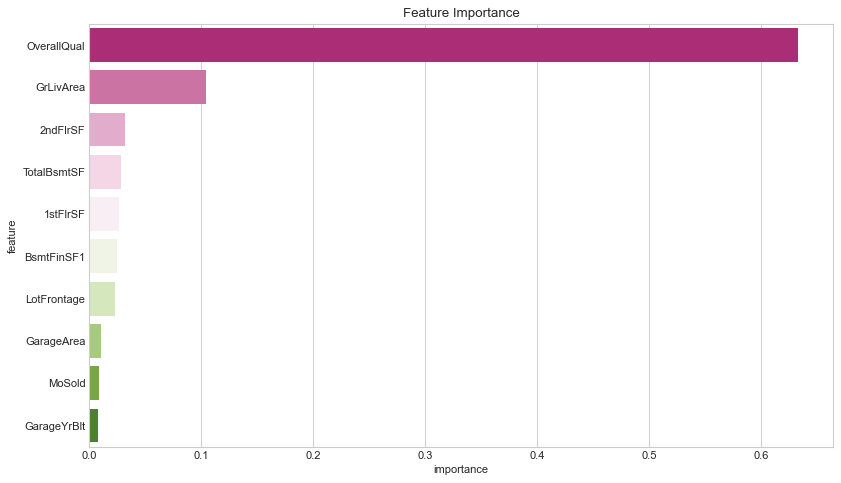

In [19]:
import seaborn as sns
plt.figure(figsize = (12,7), dpi = 80)
plt.title('Feature Importance')
sns.barplot(data = tree_importance_df.head(10), x = 'importance', y = 'feature', palette = 'PiYG');

# Random Forest 
> **QUESTION 4**: Train a random forest regressor using the training set.

In [20]:
%%time
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint as pp
rf1 = RandomForestRegressor(n_jobs = -1, random_state = 42)
rf1.fit(train_inputs, train_targets)

print('Parameters currently in use:\n')
pp(rf1.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}
CPU times: total: 2.5 s
Wall time: 376 ms


In [21]:
# training set :
rf1_train_preds = rf1.predict(train_inputs)
rf1_train_rmse = mean_squared_error(train_targets, rf1_train_preds, squared = False)
print('Training set accuracy:', rf1.score(train_inputs, train_targets))
print('RMSE :', rf1_train_rmse)

print('-'*50)

# validation set :
rf1_val_preds = rf1.predict(val_inputs)
rf1_val_rmse = mean_squared_error(val_targets, rf1_val_preds, squared = False)
print('Validation accuracy:', rf1.score(val_inputs, val_targets))
print('RMSE :',rf1_val_rmse)

Training set accuracy: 0.9768157257964202
RMSE : 11864.318299877767
--------------------------------------------------
Validation accuracy: 0.8894394173452205
RMSE : 27830.03863639856


In [22]:
print(round(rf1.score(val_inputs, val_targets), 4))
print('Accuracy on validation set is now increase from 0.796 to 0.8894')

0.8894
Accuracy on validation set is now increase from 0.796 to 0.8894


## Hyperparameter Tuning

Let us now tune the hyperparameters of our model. You can find the hyperparameters for `RandomForestRegressor` here: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html

<img src="https://i.imgur.com/EJCrSZw.png" width="480">

Hyperparameters are use

Let's define a helper function `test_params` which can test the given value of __one or more hyperparameters.__

In [23]:
def test_params(**params):
    model = RandomForestRegressor(n_jobs=-1, random_state=42, **params).fit(train_inputs, train_targets)
    train_rmse = mean_squared_error(train_targets, model.predict(train_inputs), squared=False)
    val_rmse = mean_squared_error(val_targets, model.predict(val_inputs), squared=False)
    return train_rmse, val_rmse

In [24]:
test_params(n_estimators=20, max_depth=20)

(13776.89957127333, 28886.033523273858)

In [25]:
test_params(n_estimators=50, max_depth=10, min_samples_leaf=4, max_features=0.4)

(20490.359632429263, 29804.931642791606)

Let's also define a helper function to test and plot different values of a single parameter.

In [26]:
def test_param_and_plot(param_name, param_values):
    train_errors, val_errors = [], []
    
    for value in param_values:
        params = {param_name:value}
        train_rmse, val_rmse = test_params(**params) 
        train_errors.append(train_rmse)
        val_errors.append(val_rmse)
        
    plt.figure(figsize=(12, 6), dpi=80)
    plt.title('Overfitting curve: '+ param_name)
    plt.plot(param_values, train_errors, 'b-o', color = 'skyblue')
    plt.plot(param_values, val_errors, 'r-o', color = 'orchid')
    plt.xlabel(param_name)
    plt.ylabel('RMSE')
    plt.legend(['Training', 'Validation'])

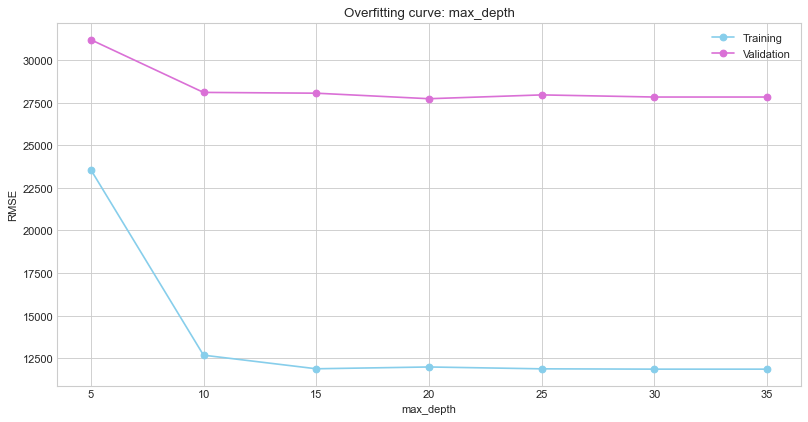

In [27]:
test_param_and_plot('max_depth', [5, 10, 15, 20, 25, 30, 35])

### Note :
From the above graph, it appears that the best value for `max_depth` is around $20$, beyond which the model starts to overfit.

## Training the Best Model🧩

> **QUESTION 7**: Train a random forest regressor model with your best hyperparameters to minimize the validation loss.

In [28]:
from sklearn.model_selection import RandomizedSearchCV

# number of trees in the forest:
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# number of features to consider on every split:
max_features = ['auto', 'sqrt']

# Maximum number of levels in the tree:
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

# Mininum number of samples required to split a node:
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf:
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for training each tree:
bootstrap = [True, False]

### Creating a random grid

In [29]:
random_grid = {'n_estimators': n_estimators, 'max_features': max_features, 'max_depth': max_depth,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pp(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [30]:
rf = RandomForestRegressor() 

rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100,
                              cv = 3, verbose = 2, random_state = 42, n_jobs = -1)

In [31]:
rf_random.fit(train_inputs, train_targets)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [32]:
rf_random.best_params_

{'n_estimators': 2000,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': True}

In [33]:
rf2 = RandomForestRegressor(n_jobs = -1, random_state = 42, n_estimators = 1800, 
                            min_samples_split = 2, min_samples_leaf = 2, 
                            max_features = 'auto', max_depth = 80, bootstrap = True)

rf2.fit(train_inputs, train_targets)

RandomForestRegressor(max_depth=80, max_features='auto', min_samples_leaf=2,
                      n_estimators=1800, n_jobs=-1, random_state=42)

In [34]:
rf2_train_preds = rf2.predict(train_inputs)
rf2_train_rmse = mean_squared_error(train_targets, rf2_train_preds, squared = False)

print('Training set Accuracy:', rf2.score(train_inputs, train_targets))
print('RMSE:', rf2_train_rmse)

print('-'*50)

rf2_val_preds = rf2.predict(val_inputs)
rf2_val_rmse = mean_squared_error(val_targets, rf2_val_preds, squared = False)

print('Validation accuracy:', rf2.score(val_inputs, val_targets))
print('RMSE:', rf2_val_rmse)

Training set Accuracy: 0.9684530762845255
RMSE: 13839.632089729845
--------------------------------------------------
Validation accuracy: 0.8945985527930082
RMSE: 27172.959210376866


In [35]:
%%time
rf3 = RandomForestRegressor(n_jobs = -1, random_state = 42, n_estimators = 432, 
                            min_samples_split = 3, min_samples_leaf = 2, 
                            max_features = 'auto', max_depth = 18, bootstrap = True)

rf3.fit(train_inputs, train_targets)

rf3_val_preds = rf3.predict(val_inputs)
rf3_val_rmse = mean_squared_error(val_targets, rf3_val_preds, squared = False)

print('Validation accuracy:', rf3.score(val_inputs, val_targets))
print('RMSE:', round(rf3_val_rmse, 3))

Validation accuracy: 0.8975086111810892
RMSE: 26795.221
CPU times: total: 8.53 s
Wall time: 1.13 s


In [36]:
print(round(rf3.score(val_inputs, val_targets), 2)*100)

90.0


Let's also view and plot the feature importances.

In [37]:
rf2_importance_df = pd.DataFrame({'feature': train_inputs.columns,
                                 'importance':rf3.feature_importances_}).sort_values('importance', 
                                                                                     ascending=False)

rf2_importance_df

,feature,importance
3,OverallQual,0.565838
15,GrLivArea,0.121278
11,TotalBsmtSF,0.034345
13,2ndFlrSF,0.030868
8,BsmtFinSF1,0.028084
...,...,...
263,GarageQual_Po,0.000000
222,HeatingQC_Po,0.000000
127,RoofMatl_Membran,0.000000
125,RoofMatl_ClyTile,0.000000


In [38]:
# rf2_importance_df[rf2_importance_df['importance']>0]
# 245 rows 

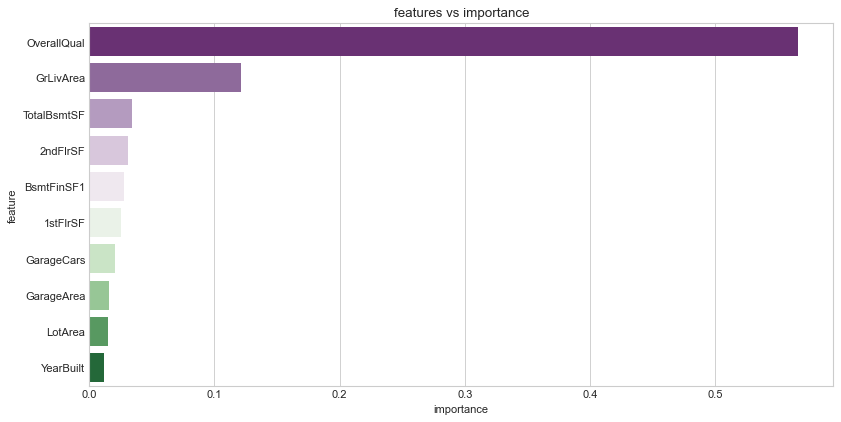

In [39]:
plt.figure(figsize=(12,6), dpi=80)
plt.title('features vs importance')
sns.barplot(data = rf2_importance_df.head(10), x='importance', y ='feature', palette='PRGn');

In [40]:
#jovian.submit('zerotogbms-a2')

## Making Predictions on the Test Set

Let's make predictions on the test set provided with the data.

In [41]:
test_df = pd.read_csv('test.csv')
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

First, we need to reapply all the preprocessing steps.

In [42]:
test_df[numeric_cols] = imputer.transform(test_df[numeric_cols])
test_df[numeric_cols] = scaler.transform(test_df[numeric_cols])
test_df[encoded_cols] = encoder.transform(test_df[categorical_cols])

test_inputs = test_df[numeric_cols + encoded_cols]

We can now make predictions using our final model.

In [43]:
test_preds = rf3.predict(test_inputs)

In [44]:
test_preds.shape

(1459,)

Submission :

In [45]:
submission_data = pd.read_csv('sample_submission.csv')
submission_data.shape

(1459, 2)

In [46]:
submission_data['SalePrice'] = test_preds